# Setup

In [1]:
# Imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pirl
from pirl.experiments import plots as myplots

In [2]:
#fname = 'data/dummy-continuous-test-20180415_141724-985942a929fb59662e9b754a67230d5d3017b0e6/results.pkl'
fname = 'data/dummy-test-20180415_123939-985942a929fb59662e9b754a67230d5d3017b0e6/results.pkl'
data = pd.read_pickle(fname)

# Value difference

In [3]:
def plot_value(data, algo_pattern='(.*)', env_pattern='(.*)', algos=['.*'], dps=2):
    value = myplots.extract_value(data)
    value.columns = value.columns.str.extract(algo_pattern, expand=False)
    envs = value.index.levels[0].str.extract(env_pattern, expand=False)
    value.index = value.index.set_levels(envs, level=0)
    
    matches = []
    mask = pd.Series(False, index=value.columns)
    for p in algos:
        m = value.columns.str.match(p)
        matches += list(value.columns[m & (~mask)])
        mask |= m
    value = value.loc[:, matches]
    
    value.columns = value.columns.str.split('_').str.join(' ')  # so lines wrap
    value = value.round(dps)
    return value
    
algo_pattern = '(.*)'
env_pattern = 'pirl/GridWorld-(Simple)-v0'
plot_value(data, algo_pattern, env_pattern, ['expert', 'mces', 'mcep.*'])

irl                                 expert      mces  mcep reg0
env    n  m  eval            type                              
Simple 10 10 irl             mean  4084.16   4049.59    4049.59
       20 20 irl             mean  4084.16   4065.60    4065.60
       10 10 value_iteration mean  4084.16  14744.48   14744.48
       20 20 value_iteration mean  4084.16  11012.37   11012.37
       10 10 irl             se       0.00      0.00       0.00
       20 20 irl             se       0.00      0.00       0.00
       10 10 value_iteration se       0.00      0.00       0.00
       20 20 value_iteration se       0.00      0.00       0.00

# Visualizing rewards (gridworld only)

/home/adam/bin/anaconda3/envs/mypirl/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ["'serif'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


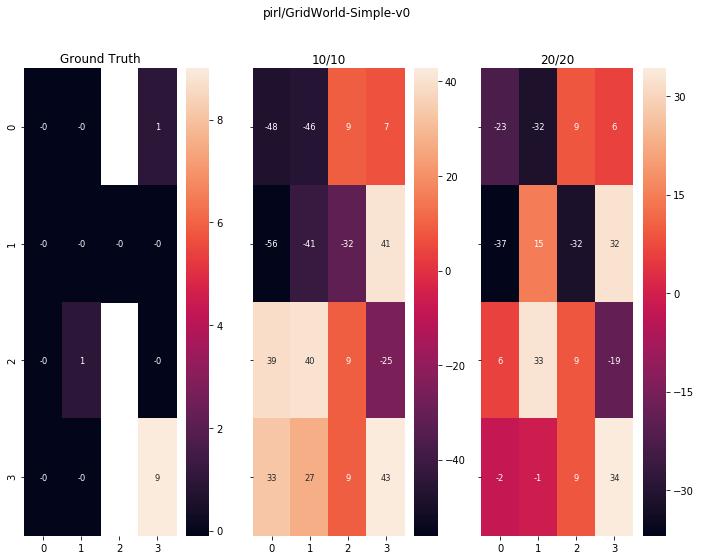

In [4]:
shape = (4,4)
irl_algo = 'mces'
figs = myplots.gridworld_heatmap(data['rewards'][irl_algo], shape)
for fig in figs:
    display(fig[1])

In [ ]:
# Save to disk
out_dir = './figs/some-experiment'
for k, v in data['reward'].items():
    pirl.experiments.plots.save_figs(pirl.experiments.plots.gridworld_heatmap(v, (4,4)), os.path.join(out_dir, k))